##**Άσκηση 1 a)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

#specify the file path
file_path = '/content/seeds_dataset.txt'

#store data on an array
data = np.genfromtxt(file_path)
tot_data = data[:,0:7] #data without labels

print(data.shape)

(210, 8)


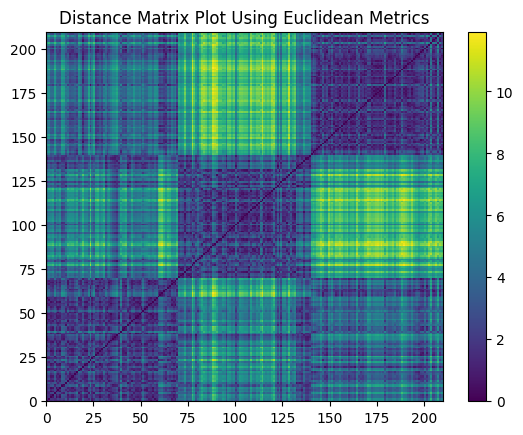

In [2]:
#find euclidean and cosine metrics
euclidean_metrics = pairwise_distances(tot_data,tot_data,metric="euclidean")
cosine_metrics = pairwise_distances(tot_data,tot_data,metric="cosine")

# print(euclidean_metrics)
# print(euclidean_metrics.shape)
# print(cosine_metrics)
# print(cosine_metrics.shape)

dim1 = data.shape[0]
plt.pcolormesh(euclidean_metrics,cmap="viridis") #create the plot for euclidean metrics
plt.colorbar() #plot a bar which matches distances with colors
plt.title("Distance Matrix Plot Using Euclidean Metrics")

#set limits to axis
plt.xlim([0,dim1])
plt.ylim([0,dim1])
plt.show()

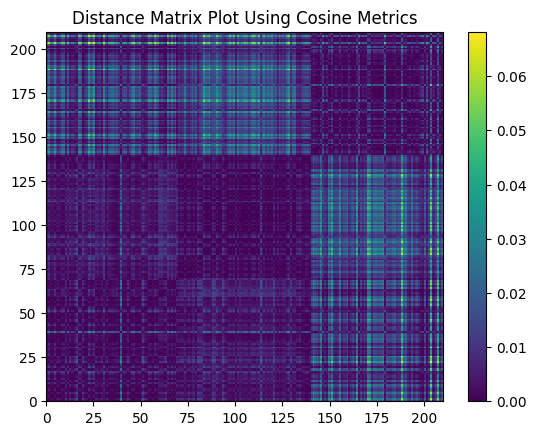

In [3]:
plt.pcolormesh(cosine_metrics,cmap="viridis") #create the plot for cosine metrics
plt.colorbar() #plot a bar which matches distances with colors
#set limits to axis
plt.xlim([0,dim1])
plt.ylim([0,dim1])
plt.title("Distance Matrix Plot Using Cosine Metrics")
plt.show()

##**Άσκηση 1 b)**

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

def silhouette_analysis(tot_data,metric1):
  silhouette_avg_array = [] #array to store silhouette average values for every k
  k_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] #number of k we want to run for

  for k in k_clusters:
      #initialize the clusterer with k_clusters
      clusterer = KMeans(n_clusters = k , n_init = 1, random_state = 0)
      cluster_labels = clusterer.fit_predict(tot_data) #predict labels

      #calculate silhouette average values and store them
      silhouette_avg = silhouette_score(tot_data, cluster_labels,metric = metric1)
      silhouette_avg_array.append(silhouette_avg)
      print(f"For k = {k} the average silhouette_score is : {silhouette_avg}")

  #plot silhouette diagram based on average values
  plt.show()
  plt.plot(k_clusters, silhouette_avg_array,marker = 'o')
  plt.grid()
  plt.xlabel('Number of clusters')
  plt.ylabel('Silhouette average values')
  plt.title(f'Silhouette score using metric: {metric1}')
  plt.show()
  print(f'The optimal number of classes is: {np.argmax(silhouette_avg_array) + 2}')

For k = 2 the average silhouette_score is : 0.5182873410849105
For k = 3 the average silhouette_score is : 0.46813908008597
For k = 4 the average silhouette_score is : 0.3964645749573993
For k = 5 the average silhouette_score is : 0.34701549132535914
For k = 6 the average silhouette_score is : 0.3406864112755031
For k = 7 the average silhouette_score is : 0.3336234222909996
For k = 8 the average silhouette_score is : 0.3301115590148433
For k = 9 the average silhouette_score is : 0.3336529259600899
For k = 10 the average silhouette_score is : 0.3310069617178977


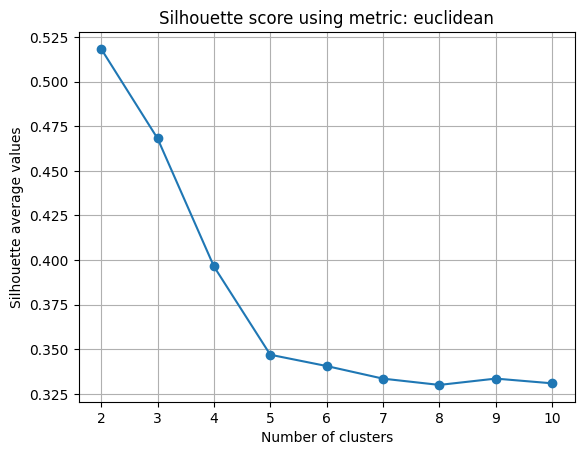

The optimal number of classes is: 2


In [5]:
silhouette_analysis(tot_data,'euclidean')

For k = 2 the average silhouette_score is : 0.7098621844742572
For k = 3 the average silhouette_score is : 0.6583885316689575
For k = 4 the average silhouette_score is : 0.5765364767373177
For k = 5 the average silhouette_score is : 0.5171471010442551
For k = 6 the average silhouette_score is : 0.5105958623205588
For k = 7 the average silhouette_score is : 0.49745619110201617
For k = 8 the average silhouette_score is : 0.4924515591904976
For k = 9 the average silhouette_score is : 0.5006709352894467
For k = 10 the average silhouette_score is : 0.4966915333431941


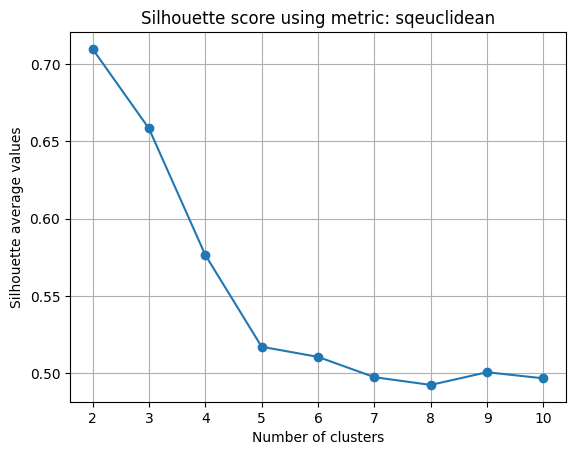

The optimal number of classes is: 2


In [6]:
silhouette_analysis(tot_data,'sqeuclidean')

##**Άσκηση 1 c)**

In [7]:
from sklearn.preprocessing import StandardScaler

#normalize data to have zero mean and unit variance
scaler = StandardScaler(with_mean=True, with_std=True)
normalized_data = scaler.fit_transform(tot_data)

#check if standard devation is 1 and mean arround 0
print(np.array(normalized_data).std())
print(np.array(normalized_data).mean())

1.0
-1.0343955472970166e-15


For k = 2 the average silhouette_score is : 0.6421239042064366
For k = 3 the average silhouette_score is : 0.5706593164959539
For k = 4 the average silhouette_score is : 0.45426421227961167
For k = 5 the average silhouette_score is : 0.3476996719993382
For k = 6 the average silhouette_score is : 0.27853705495495706
For k = 7 the average silhouette_score is : 0.280639251443571
For k = 8 the average silhouette_score is : 0.2882423565179566
For k = 9 the average silhouette_score is : 0.2962946017915685
For k = 10 the average silhouette_score is : 0.2918266078223928


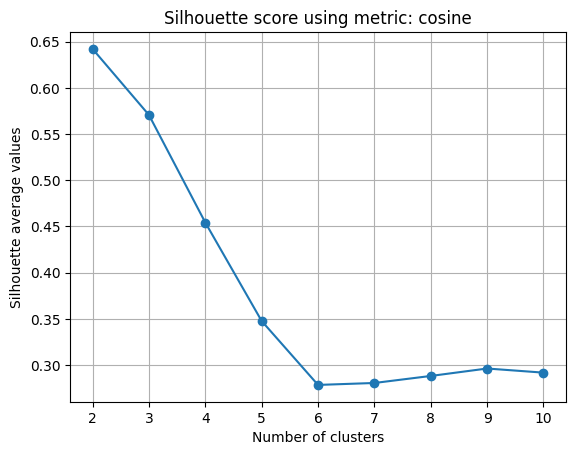

The optimal number of classes is: 2


In [8]:
#using normalized data and cosine metric
silhouette_analysis(normalized_data,'cosine')

For k = 2 the average silhouette_score is : 0.3637822338863902
For k = 3 the average silhouette_score is : 0.4041933919408507
For k = 4 the average silhouette_score is : 0.3924233018196299
For k = 5 the average silhouette_score is : 0.32929688031250204
For k = 6 the average silhouette_score is : 0.2856833779578751
For k = 7 the average silhouette_score is : 0.23727017196069097
For k = 8 the average silhouette_score is : 0.30320772815243296
For k = 9 the average silhouette_score is : 0.318443318619968
For k = 10 the average silhouette_score is : 0.2744276925704446


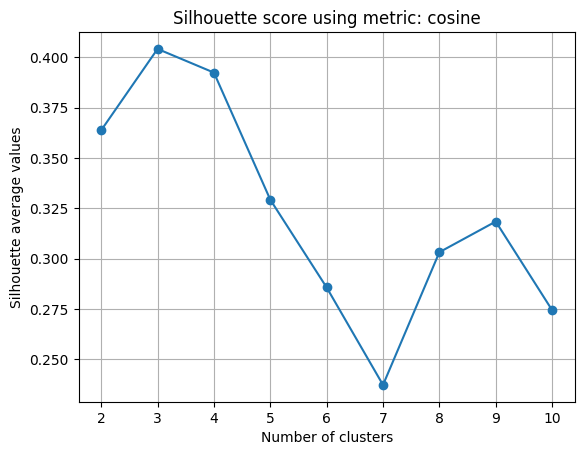

The optimal number of classes is: 3


In [9]:
#with original data
silhouette_analysis(tot_data,'cosine')

##**Άσκηση 1 d)**


In [10]:
from sklearn.metrics.cluster import rand_score,adjusted_rand_score

data = np.genfromtxt(file_path)
tot_data = data[:,0:7] #data without labels
true_labels = data[:,7] #labels array

#initialize KMeans
kmeans = KMeans(n_clusters = 3, n_init = 1,random_state = 1)

#fit the model and predict the labels
predicted_labels = kmeans.fit_predict(tot_data)

#rand index calculation
rand_index = rand_score(true_labels, predicted_labels)
print(f"Rand Index is: {rand_index}")

Rand Index is: 0.8743677375256322


In [11]:
rand_indices = []

for _ in range(5):
    #initialize KMeans with random centers
    kmeans = KMeans(n_clusters = 3, n_init = 1, init = 'random', random_state = 1)

    #fit the model and predict the labels
    predicted_labels = kmeans.fit_predict(tot_data)

    #rand index calculation
    rand_index = rand_score(true_labels, predicted_labels)

    #append rand index values to the list
    rand_indices.append(rand_index)

#calculate mean and variance of Rand Indices
mean_rand_index = np.mean(rand_indices)
variance_rand_index = np.var(rand_indices)

print("Mean Rand Index:", mean_rand_index)
print("Variance of Rand Index:", variance_rand_index)

Mean Rand Index: 0.8743677375256322
Variance of Rand Index: 0.0


##**Άσκηση 1 e)**

In [12]:
#normalize data in order to simulate cosine metric for KMeans
length = np.sqrt((normalized_data**2).sum(axis=1))[:,None]
Xn = normalized_data/length

#initialize KMeans
kmeans = KMeans(n_clusters = 3, n_init = 1, random_state = 1)

#fit the model and predict the labels
predicted_labels = kmeans.fit_predict(Xn)

#rand index calculation
rand_index = rand_score(true_labels, predicted_labels)
print(f"Rand Index is: {rand_index}")

Rand Index is: 0.8616085668717247


In [13]:
rand_indices = []

for _ in range(5):
    #initialize KMeans with random centers
    kmeans = KMeans(n_clusters = 3, n_init = 1, init = 'random', random_state = 1)

    #fit the model and predict the labels
    predicted_labels = kmeans.fit_predict(Xn)

    #rand index calculation
    rand_index = rand_score(true_labels, predicted_labels)

    #append rand index values to the list
    rand_indices.append(rand_index)

#calculate mean and variance of Rand Indices
mean_rand_index = np.mean(rand_indices)
variance_rand_index = np.var(rand_indices)

print("Mean Rand Index:", mean_rand_index)
print("Variance of Rand Index:", variance_rand_index)

Mean Rand Index: 0.8616085668717247
Variance of Rand Index: 0.0


##**Άσκηση 2 b)**

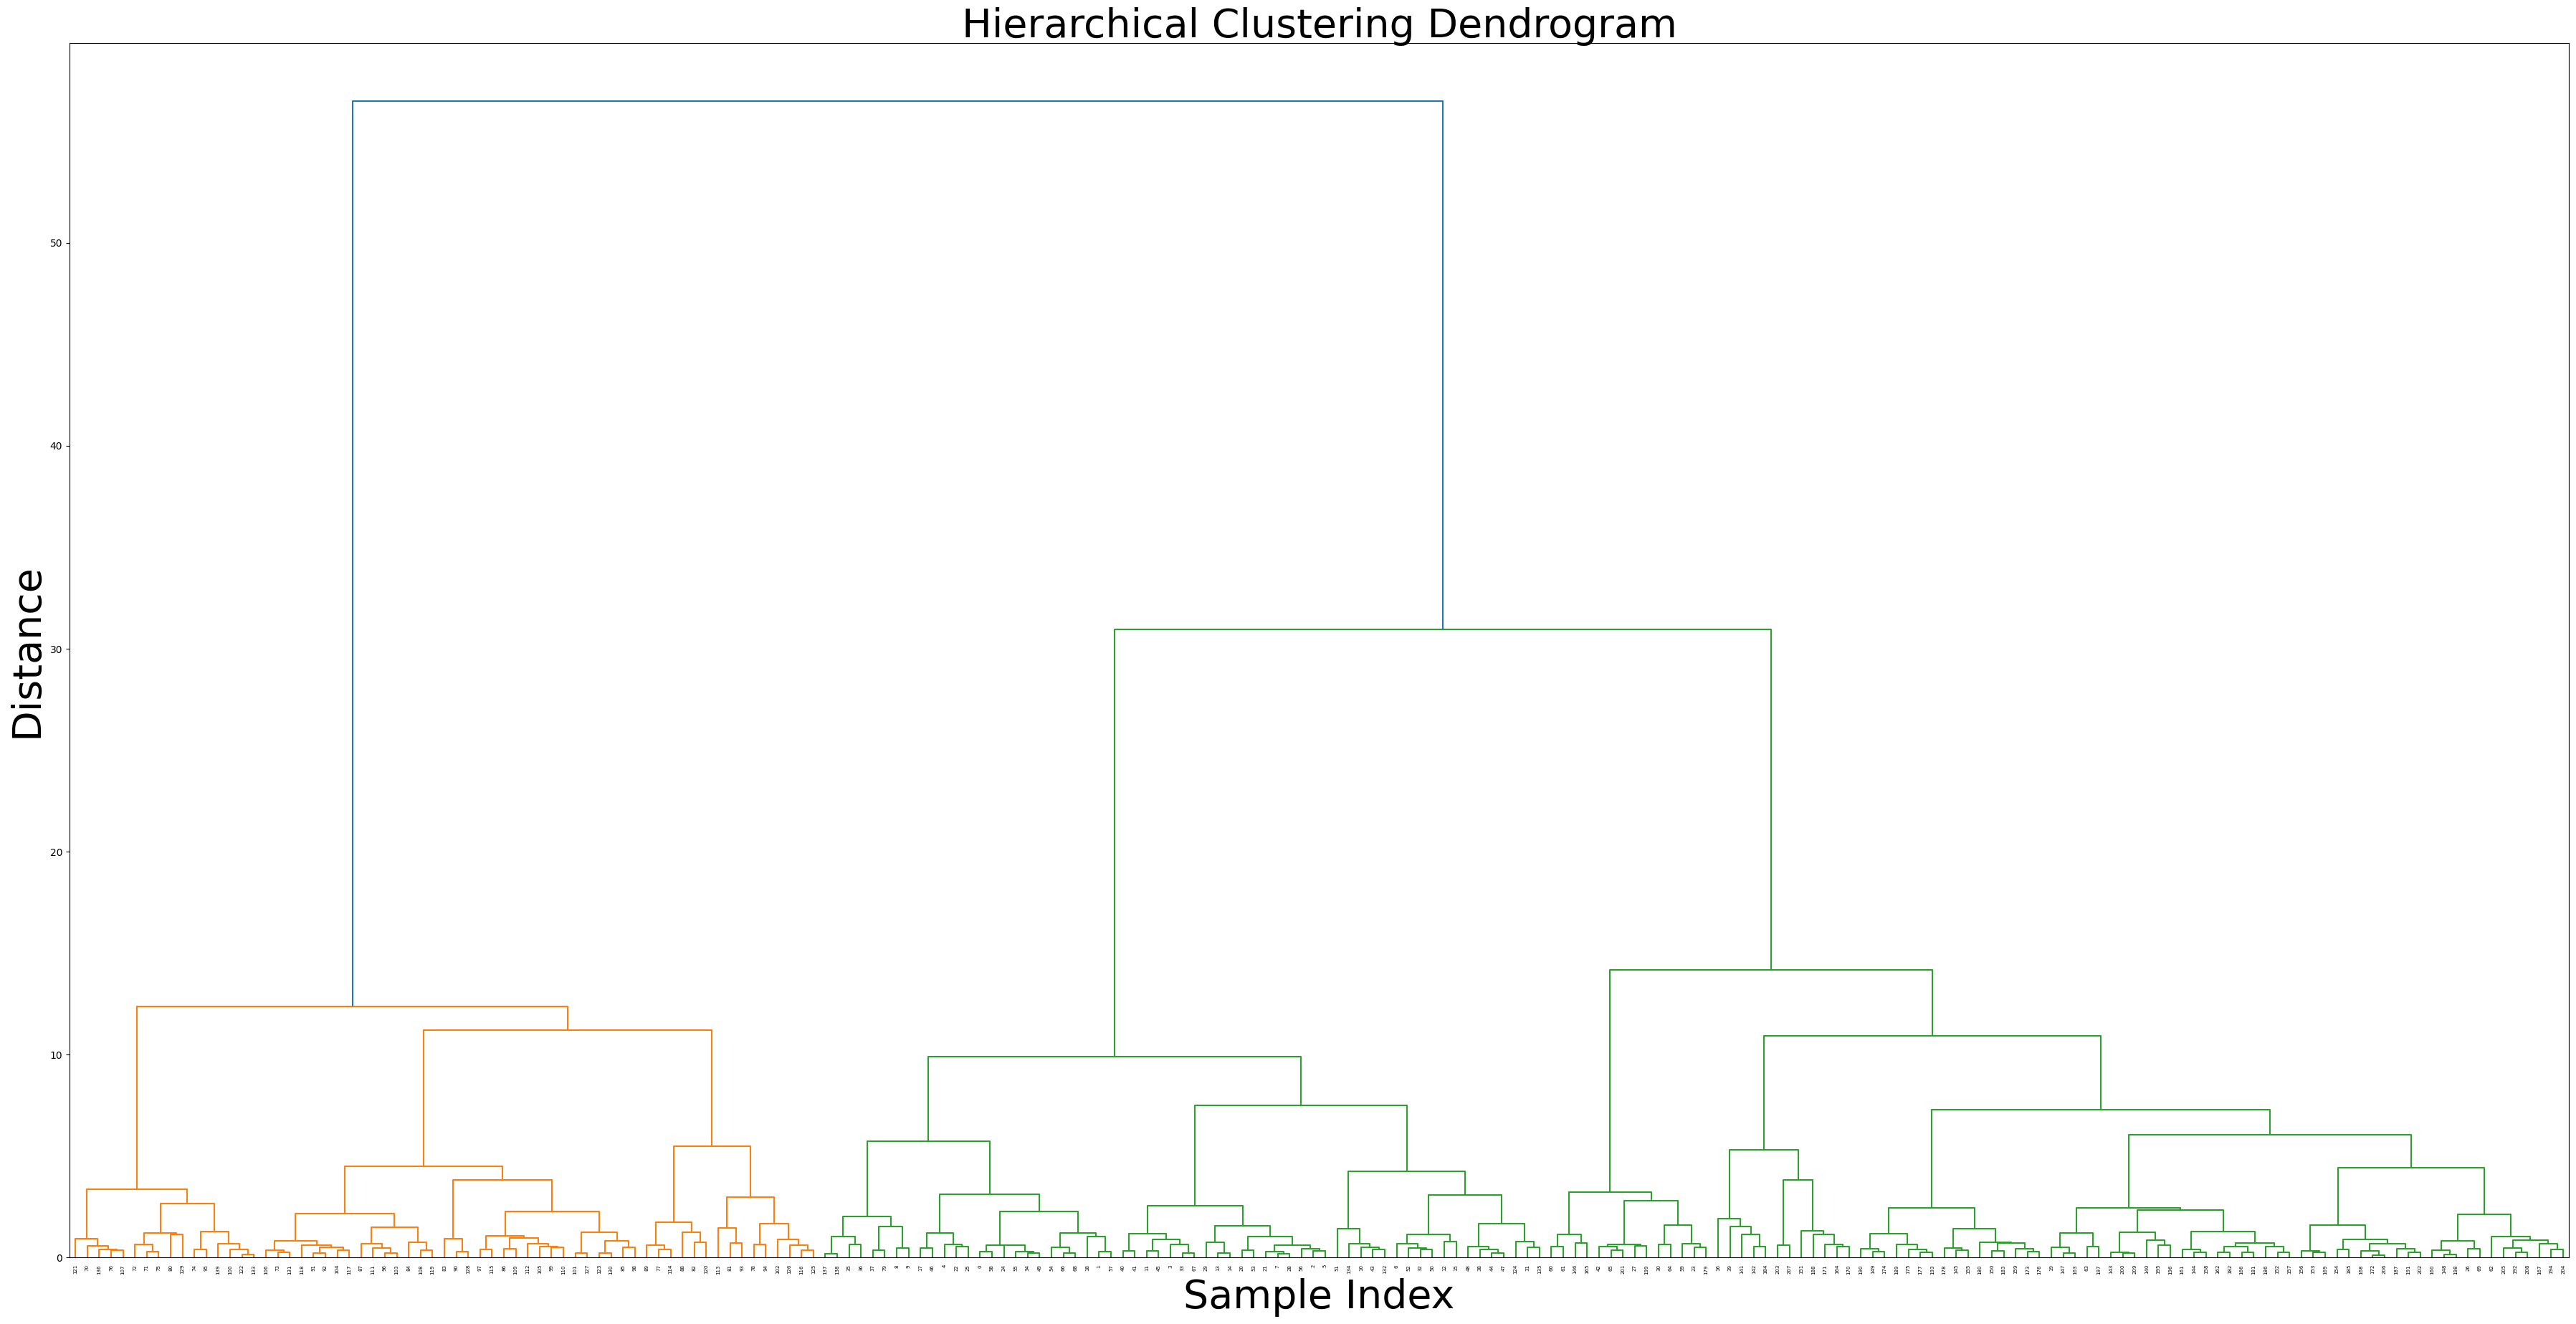

In [14]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

file_path = '/content/seeds_dataset.txt'
data = np.genfromtxt(file_path)
tot_data = data[:,0:7] #data without labels
true_labels = data[:,7] #labels array

#apply agglomerative clustering using ward method and euclidean metric
linkage_matrix = linkage(tot_data, method='ward',metric='euclidean')

#plot the dendrogram based on linkage matrix
plt.figure(figsize=(45,22))
dendrogram(linkage_matrix)

plt.title('Hierarchical Clustering Dendrogram',fontsize = 40)
plt.xlabel('Sample Index',fontsize = 40)
plt.ylabel('Distance',fontsize = 40)
plt.show()

##**Άσκηση 2 c)**

In [15]:
num_of_clusters = 3 #define number of clusters

#assign data points to clusters based on the hierarchical clustering linkage matrix
labels = fcluster(linkage_matrix, t=num_of_clusters, criterion='maxclust')

#evaluate clustering using the rand index
rand_index = rand_score(true_labels, labels)
print(f"Rand Index is: {rand_index}")

Rand Index is: 0.8722715880610618


##**Άσκηση 3 a)**

In [16]:
from sklearn.decomposition import PCA

file_path = '/content/seeds_dataset.txt'
data = np.genfromtxt(file_path)
tot_data = data[:,0:7] #data without labels
true_labels = data[:,7] #labels array

#normalize data to have zero mean and unit variance
scaler = StandardScaler(with_mean=True, with_std=True)
scaled_data = scaler.fit_transform(tot_data)

#fit and transform the scaled data using PCA
pca = PCA()
pca_res = pca.fit_transform(scaled_data)

#calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

#calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

variance = [0.9,0.99] #set desired variance values
for i in variance:
  n_components = np.argmax(cumulative_explained_variance >= i) + 1
  print(f"Number of components to retain {i*100}% of variance is: {n_components}")

Number of components to retain 90.0% of variance is: 3
Number of components to retain 99.0% of variance is: 4


##**Άσκηση 3 b)**

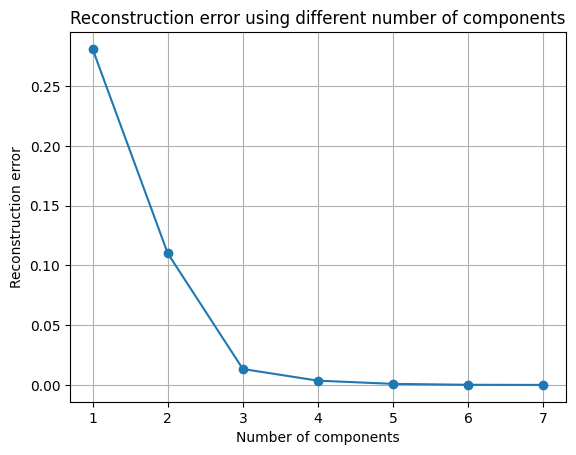

In [17]:
num_of_components = range(1, 8)
recon_errors = []

for n in num_of_components:
    #fit and transform the scaled data using PCA
    pca = PCA(n_components=n)
    pca_res = pca.fit_transform(scaled_data)

    #reconstruct the data from the transformation result
    recon_data = pca.inverse_transform(pca_res)

    #reconstruction mean square error calculation and append for each iteration
    recon_error = np.mean(np.square(scaled_data - recon_data))
    recon_errors.append(recon_error)

#plot reconstruction error diagramm for n = 1,2,3..,7 components
plt.plot(num_of_components, recon_errors, marker='o')
plt.grid()
plt.xlabel('Number of components')
plt.ylabel('Reconstruction error')
plt.title('Reconstruction error using different number of components')
plt.show()

##**Άσκηση 3 c)**

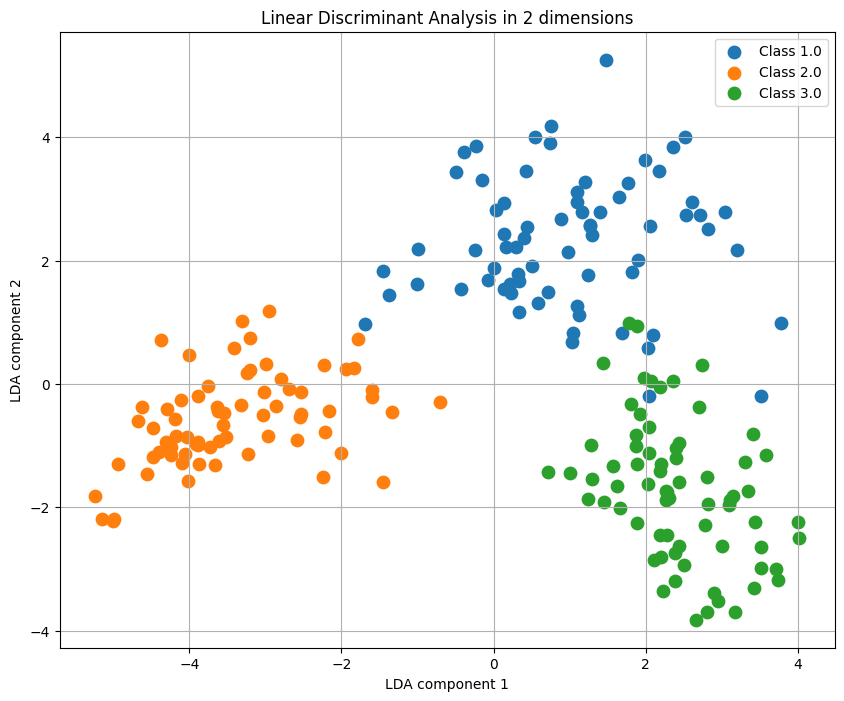

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

file_path = '/content/seeds_dataset.txt'
data = np.genfromtxt(file_path)
tot_data = data[:,0:7] #data without labels
true_labels = data[:,7] #labels array

#normalize data to have zero mean and unit variance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(tot_data)

#apply linear discriminant analysis in 2D
lda = LinearDiscriminantAnalysis(n_components=2)
lda_data = lda.fit_transform(scaled_data, true_labels)

#plot LDA for 2D
plt.figure(figsize = (10, 8))
for class_label in np.unique(true_labels):
    plt.scatter(lda_data[true_labels == class_label, 0], lda_data[true_labels == class_label, 1], label=f'Class {class_label}', s=80)

plt.title('Linear Discriminant Analysis in 2 dimensions')
plt.xlabel('LDA component 1')
plt.ylabel('LDA component 2')
plt.legend()
plt.grid()
plt.show()

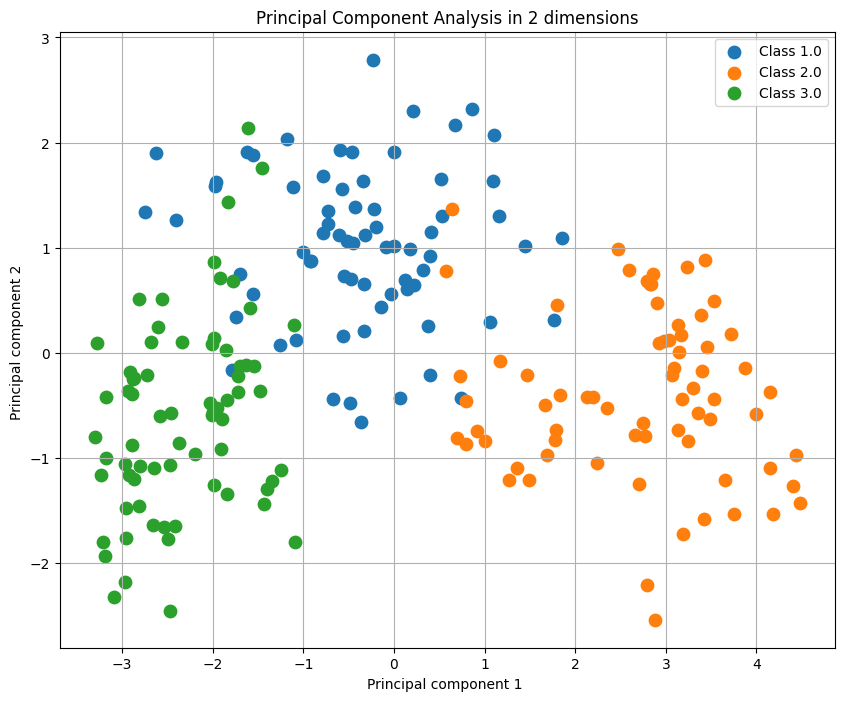

In [19]:
#PCA Plot using 2 component in order to compare with LDA Analysis plot
#apply principal component analysis with 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

#plot the data in 2D
plt.figure(figsize = (10, 8))
for class_label in np.unique(true_labels):
    plt.scatter(pca_data[true_labels == class_label, 0], pca_data[true_labels == class_label, 1], label=f'Class {class_label}', s=80)

plt.xlabel('Principal component 1 ')
plt.ylabel('Principal component 2 ')
plt.title('Principal Component Analysis in 2 dimensions')
plt.legend()
plt.grid()
plt.show()

##**Άσκηση 3 d)**

In [20]:
#find the coefficients of the linear discriminants for each class
lda_coefficients = lda.coef_
coef_abs = np.abs(lda_coefficients)
#print(coef_abs)

mean_column_coef_vals = np.mean(coef_abs,axis = 0)
#print(mean_column_coef_vals)

#find the indices of the two largest values
largest_indices = np.argsort(mean_column_coef_vals)[-2:]
print(f"The most important characteristics located at {largest_indices[0]} and {largest_indices[1]}")
#find the indices of the two smallest values
smallest_indices = np.argsort(mean_column_coef_vals)[:2]
print(f"The less important characteristics located at {smallest_indices[0]} and {smallest_indices[1]}")

The most important characteristics located at 0 and 1
The less important characteristics located at 4 and 5


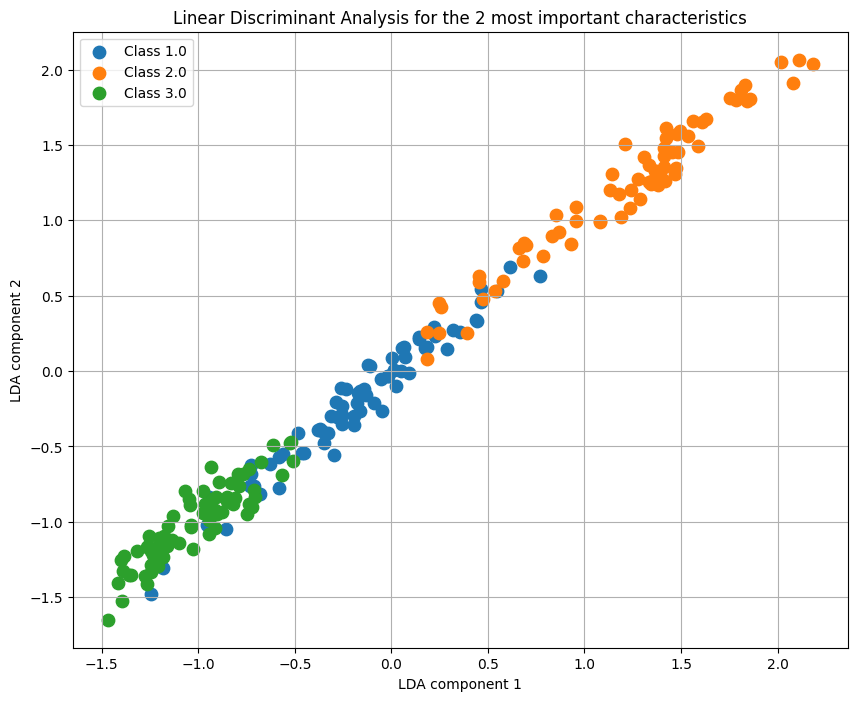

In [21]:
tot_data = data[:,[0,1]] #data without labels
true_labels = data[:,7] #labels array

#normalize data to have zero mean and unit variance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(tot_data)

#plot LDA for 2D
plt.figure(figsize = (10, 8))
for class_label in np.unique(true_labels):
    plt.scatter(scaled_data[true_labels == class_label, 0], scaled_data[true_labels == class_label, 1], label=f'Class {class_label}', s=80)

plt.title('Linear Discriminant Analysis for the 2 most important characteristics')
plt.xlabel('LDA component 1')
plt.ylabel('LDA component 2')
plt.legend()
plt.grid()
plt.show()

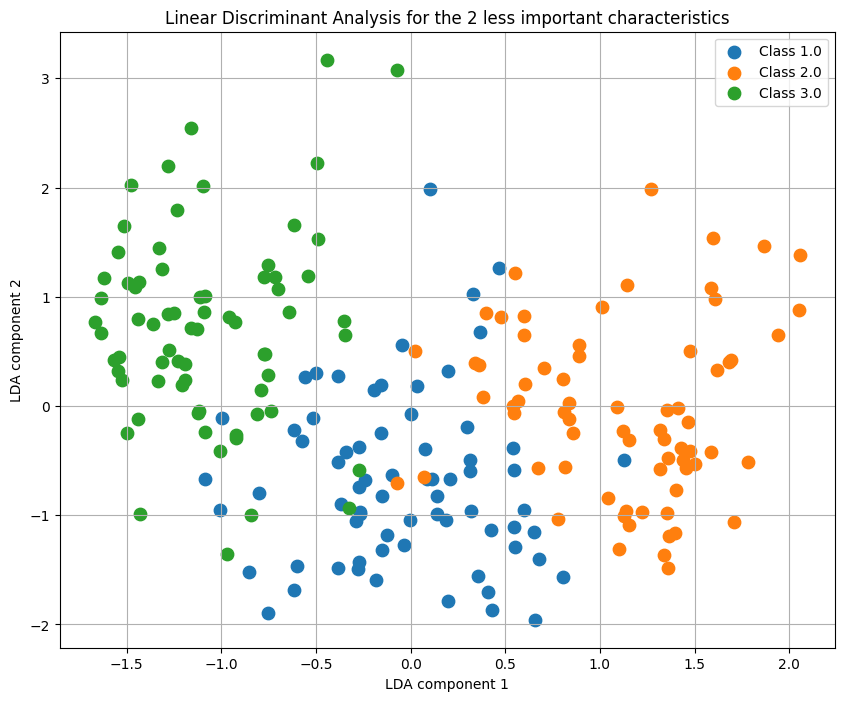

In [22]:
tot_data = data[:,[4,5]] #data without labels
true_labels = data[:,7] #labels array

#normalize data to have zero mean and unit variance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(tot_data)

#plot LDA for 2D
plt.figure(figsize = (10, 8))
for class_label in np.unique(true_labels):
    plt.scatter(scaled_data[true_labels == class_label, 0], scaled_data[true_labels == class_label, 1], label=f'Class {class_label}', s=80)

plt.title('Linear Discriminant Analysis for the 2 less important characteristics')
plt.xlabel('LDA component 1')
plt.ylabel('LDA component 2')
plt.legend()
plt.grid()
plt.show()

##**Άσκηση 4 a)**

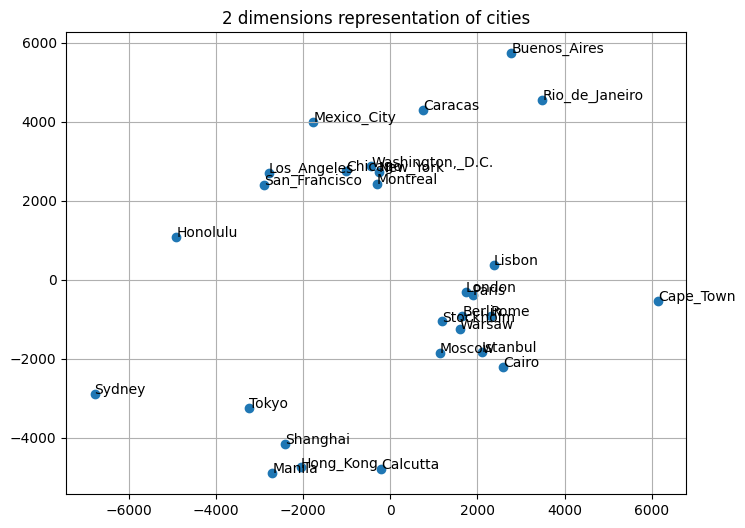

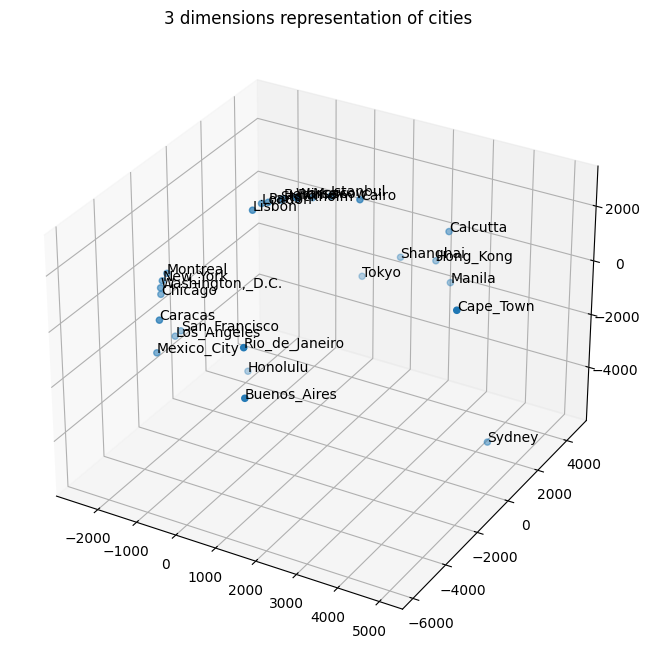

In [23]:
from sklearn import manifold
from mpl_toolkits.mplot3d import Axes3D

#specify the file path
file_path = '/content/Distance_Matrix_world.txt'
names_path = '/content/City_names_world.txt'

#store data on an array
distances = np.genfromtxt(file_path)
city_names = np.genfromtxt(names_path, dtype=str)

#perform classical MDS for 2D representation
mds_2d = manifold.MDS(n_components=2, dissimilarity='precomputed', random_state=1,normalized_stress = 'auto')
mds_res_2d = mds_2d.fit_transform(distances) #fit and transform data

#plot 2D representation
plt.figure(figsize=(8, 6))
plt.scatter(mds_res_2d[:, 0], mds_res_2d[:, 1])

for i, (x,y) in enumerate(mds_res_2d):
    plt.text(x, y, f'{city_names[i]}')

plt.title('2 dimensions representation of cities')
plt.grid()
plt.show()

#perform classical MDS for 3D representation
mds_3d = manifold.MDS(n_components=3, dissimilarity='precomputed', random_state=1,normalized_stress = 'auto')
mds_res_3d = mds_3d.fit_transform(distances) #fit and transform data


#plot 3D representation
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mds_res_3d[:, 0], mds_res_3d[:, 1], mds_res_3d[:, 2])

for j, (x,y,z) in enumerate(mds_res_3d):
    ax.text(x, y, z, f'{city_names[j]}')

ax.set_title('3 dimensions representation of cities')

plt.show()

##**Άσκηση 4 b)**

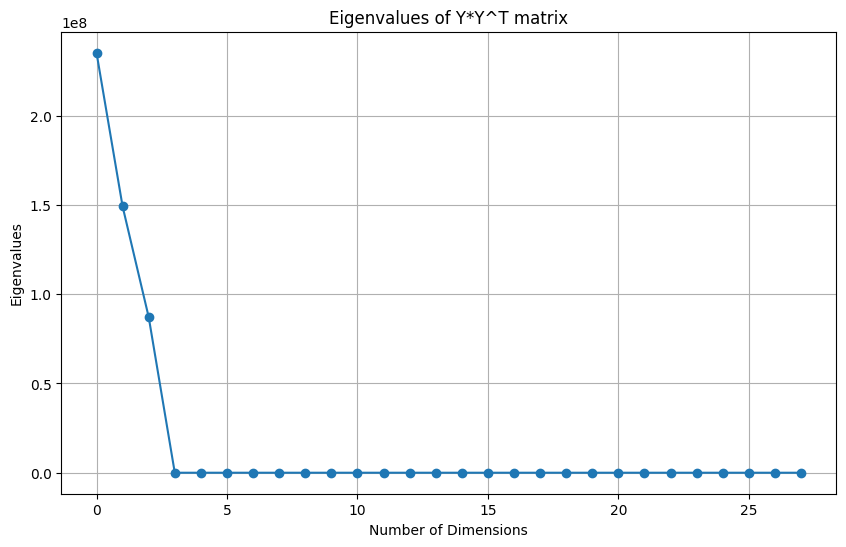

Eigenvalues in descending order: 
 [ 2.35339825e+08  1.49210129e+08  8.72224663e+07  8.51224637e+02
  1.94440837e+02  1.32855277e+02  8.94005650e+01  6.18575768e+01
  5.69285829e+01  3.32950504e+01  2.46572897e+01  1.62955703e+01
  1.55933650e+01  1.17986404e+01  6.91230192e+00  5.18382060e+00
  4.05224717e+00  3.24628543e+00  2.16777373e+00  1.49795683e+00
  1.31721501e+00  8.77417926e-01  6.18056955e-01  1.46635256e-01
  4.73141201e-02  1.23050954e-02  8.86628107e-04 -3.38910397e-09]


In [24]:
#perform classical MDS for all the components
mds = manifold.MDS(n_components=27, dissimilarity='precomputed', random_state=1,normalized_stress = 'auto')
mds_res = mds.fit_transform(distances) #fit and transform data
y_yt = np.dot(mds_res, mds_res.T) #define Y * Y^T array
eigenvalues = np.linalg.eigvals(y_yt) #calculate eigenvalues for Y * Y^T array
eigenvalues_in_descend = np.sort(eigenvalues)[::-1] #sort eigenvalues in descending order

#plot the eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(eigenvalues_in_descend, marker='o', linestyle='-')
plt.title('Eigenvalues of Y*Y^T matrix')
plt.xlabel('Number of Dimensions')
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()

print(f"Eigenvalues in descending order: \n {eigenvalues_in_descend}")

##**BONUS**


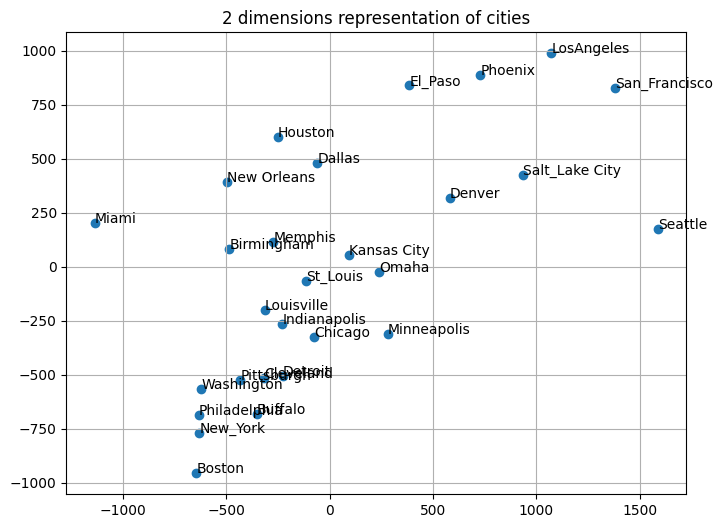

In [25]:
#specify the file path
file_path = '/content/Distance_Matrix_US.txt'
names_path = '/content/City_names_US.txt'

#store data on an array
distances = np.genfromtxt(file_path)
city_names = np.genfromtxt(names_path, dtype=str,delimiter='\t')

#perform classical MDS for 2D representation
mds_2d = manifold.MDS(n_components=2, dissimilarity='precomputed', random_state=1,normalized_stress = 'auto')
mds_res_2d = mds_2d.fit_transform(distances) #fit and transform data

#plot 2D representation
plt.figure(figsize=(8, 6))
plt.scatter(mds_res_2d[:, 0], mds_res_2d[:, 1])

for i, (x,y) in enumerate(mds_res_2d):
    plt.text(x, y, f'{city_names[i]}')

plt.title('2 dimensions representation of cities')
plt.grid()
plt.show()

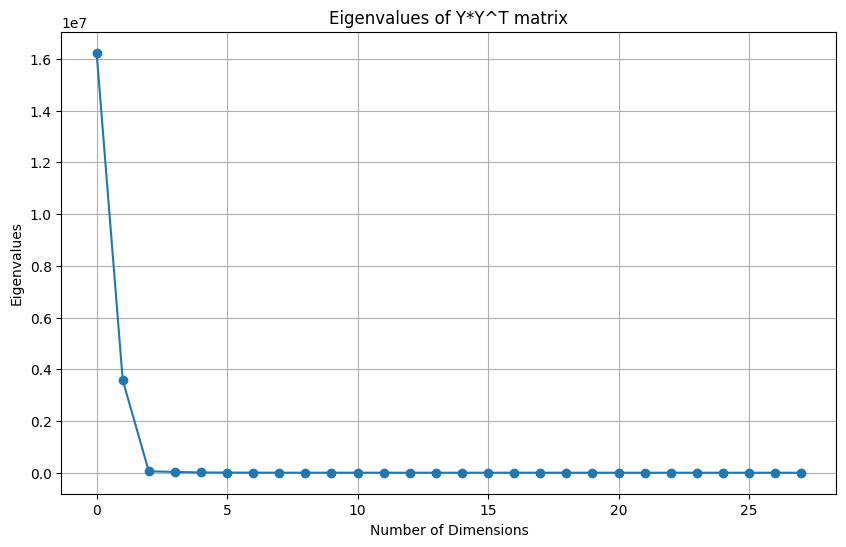

Eigenvalues in descending order: 
 [1.62396226e+07 3.58005926e+06 5.31825120e+04 3.16349004e+04
 1.03150041e+04 6.13968848e+03 3.57774029e+03 1.70844306e+03
 1.41919650e+03 1.22428752e+03 8.65732438e+02 7.29324682e+02
 6.14386774e+02 5.39894633e+02 3.48216534e+02 2.99110403e+02
 2.38118433e+02 1.84508087e+02 1.43709821e+02 9.43308888e+01
 6.34877958e+01 6.00719848e+01 4.01716644e+01 2.09747006e+01
 1.08480815e+01 7.10515266e+00 2.65742550e-01 8.55004426e-11]


In [26]:
#perform classical MDS for all the components
mds = manifold.MDS(n_components=27, dissimilarity='precomputed', random_state=1,normalized_stress = 'auto')
mds_res = mds.fit_transform(distances) #fit and transform data
y_yt = np.dot(mds_res, mds_res.T) #define Y * Y^T array
eigenvalues = np.linalg.eigvals(y_yt) #calculate eigenvalues for Y * Y^T array
eigenvalues_in_descend = np.sort(eigenvalues)[::-1] #sort eigenvalues in descending order

#plot the eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(eigenvalues_in_descend, marker='o', linestyle='-')
plt.title('Eigenvalues of Y*Y^T matrix')
plt.xlabel('Number of Dimensions')
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()

print(f"Eigenvalues in descending order: \n {eigenvalues_in_descend}")